In [5]:
# load pandas for data analysis
import pandas as pd

# load dataset
parking_violations = pd.read_csv('../data/Parking_Violations_Issued_in_August_2018.csv')

In [6]:
# head of dataset
parking_violations.head()

,OBJECTID,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_CODE,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,VIOLATION_PROC_DESC,LOCATION,PLATE_STATE,...,PENALTY_2,PENALTY_3,PENALTY_4,PENALTY_5,XCOORD,YCOORD,LATITUDE,LONGITUDE,MAR_ID,GIS_LAST_MOD_DTTM
0,290490,2018/08/24 04:00:00+00,01:44 AM,7,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,4205 4TH ST SE,,...,NaN,1.0,NaN,NaN,399920.0,129047.0,38.829,-77.001,147401.0,2019/05/29 04:16:08+00
1,290491,2018/08/24 04:00:00+00,01:46 PM,7,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,4205 4TH ST SE,,...,NaN,NaN,NaN,NaN,399920.0,129047.0,38.829,-77.001,147401.0,2019/05/29 04:16:08+00
2,290492,2018/08/24 04:00:00+00,02:20 AM,7,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,4329 4TH ST SE,,...,NaN,1.0,NaN,NaN,399867.0,128923.0,38.828,-77.002,147406.0,2019/05/29 04:16:08+00
3,290493,2018/08/24 04:00:00+00,02:25 AM,7,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,4221 4TH ST SE,,...,NaN,1.0,NaN,NaN,399923.0,128963.0,38.828,-77.001,147405.0,2019/05/29 04:16:08+00
4,290494,2018/08/24 04:00:00+00,03:20 AM,7,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,4337 4TH ST SE,,...,NaN,NaN,NaN,NaN,399860.0,128878.0,38.828,-77.002,147392.0,2019/05/29 04:16:08+00


In [7]:
# dataset info
parking_violations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86493 entries, 0 to 86492
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OBJECTID              86493 non-null  int64  
 1   ISSUE_DATE            86493 non-null  object 
 2   ISSUE_TIME            86458 non-null  object 
 3   ISSUING_AGENCY_CODE   86493 non-null  int64  
 4   ISSUING_AGENCY_NAME   86493 non-null  object 
 5   ISSUING_AGENCY_SHORT  86493 non-null  object 
 6   VIOLATION_CODE        86493 non-null  object 
 7   VIOLATION_PROC_DESC   84609 non-null  object 
 8   LOCATION              86488 non-null  object 
 9   PLATE_STATE           86493 non-null  object 
 10  VEHICLE_TYPE          0 non-null      float64
 11  MULTI_OWNER_NUMBER    4448 non-null   float64
 12  DISPOSITION_CODE      35972 non-null  float64
 13  DISPOSITION_TYPE      86493 non-null  object 
 14  DISPOSITION_DESC      35972 non-null  object 
 15  DISPOSITION_DATE   

## Observations

Null fields:
* VEHICLE_TYPE
* PENALTY_1
* PENALTY_2
* PENALTY_3
* PENALTY_4
* PENALTY_5

Disposition fields - determine significance of DISPOSITION_CODE, DISPOSITION_TYPE, DISPOSITION_DESC, DISPOSITION_DATE
    
Date fields that require additional review:
* ISSUE_DATE - format
* GIS_LAST_MOD_DTTM - format, determine unique values and overall relevance
    

In [8]:
# drop null columns
parking_violations.drop(['VEHICLE_TYPE', 'PENALTY_1', 'PENALTY_2', 'PENALTY_3', 'PENALTY_4', 'PENALTY_5'], axis=1, inplace=True)

In [9]:
# get values for disposition fields
parking_violations['DISPOSITION_DESC'].unique()

array(['DEEMED LIABLE', nan, 'RECONSIDER DENIED', 'DISM NOI LATE HEARG',
       'DISM NOI SUBM LATE', 'DISMISSED NO CASE', 'LIABLE',
       'DISM MAKE MISMATCH', 'DISMISSED ON MERIT', 'DISM STOLEN RPT PROV',
       'LIABLE PENALTY DISM', 'LIABLE FINE REDUCED', 'DISM NO VIOL CODE',
       'DISM NO SIDE OF STR', 'DISM NO QUADRANT', 'DISM ILLEGIBLE DATA',
       'RECONSIDER GRANTED', 'DISM NO LICNSE STATE', 'CONTINUED',
       'CCU SETTLEMENT', 'DISM DATA ENTRY ERR', 'VOID REQUEST BY DPW',
       'PARK MOBILE RECEIPT', 'LIABLE METER OUTAGE',
       'DISM ROSA EXEMPTION', 'REMOVE PENALTY 1&2', 'DISM NO VEHCL MAKE',
       'CONTINUE ROSA', 'EVIDENCE PER CODE', 'RECONDENY PENDISMIS',
       'LIABLE FL TO PAY MET', 'APPEAL BACKOUT', 'DISM METER OUTAGE',
       'APL CANCEL FILING', 'DISM WRONG LOCATION', 'DISM OFFICL GOVT BUS',
       'LIAB DEFAULT DENIED', 'APPEAL REVERSE NOI', 'VOID REQUEST BY MPD',
       'ADMINISTRATIVE DISM', 'APPEAL AFFIRM NOI', 'CCU MORCA SETTLEMENT',
       'DISM INCOR

In [10]:
# dispositions are dismissed tickets
# remove records with dispositions
parking_violations = parking_violations[parking_violations['DISPOSITION_DESC'].isna()]

# drop disposition columns
parking_violations.drop(['DISPOSITION_CODE', 'DISPOSITION_TYPE', 'DISPOSITION_DESC', 'DISPOSITION_DATE'], axis=1, inplace=True)

In [11]:
parking_violations['MULTI_OWNER_NUMBER'].unique()

array([           nan, 9.50368779e+08, 2.07110000e+07, ...,
       9.50356160e+08, 9.50152397e+08, 9.50212128e+08])

In [12]:
parking_violations.drop('MULTI_OWNER_NUMBER', axis=1, inplace=True)

In [13]:
parking_violations['GIS_LAST_MOD_DTTM'].unique()

array(['2019/05/29 04:16:08+00'], dtype=object)

In [14]:
# column has a single value, drop it
parking_violations.drop('GIS_LAST_MOD_DTTM', axis=1, inplace=True)

In [15]:
parking_violations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50521 entries, 1 to 86490
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OBJECTID              50521 non-null  int64  
 1   ISSUE_DATE            50521 non-null  object 
 2   ISSUE_TIME            50506 non-null  object 
 3   ISSUING_AGENCY_CODE   50521 non-null  int64  
 4   ISSUING_AGENCY_NAME   50521 non-null  object 
 5   ISSUING_AGENCY_SHORT  50521 non-null  object 
 6   VIOLATION_CODE        50521 non-null  object 
 7   VIOLATION_PROC_DESC   48639 non-null  object 
 8   LOCATION              50519 non-null  object 
 9   PLATE_STATE           50521 non-null  object 
 10  FINE_AMOUNT           48613 non-null  float64
 11  TOTAL_PAID            50521 non-null  float64
 12  XCOORD                49324 non-null  float64
 13  YCOORD                49324 non-null  float64
 14  LATITUDE              49324 non-null  float64
 15  LONGITUDE          

In [16]:
parking_violations['PLATE_STATE'].unique()

array([' ', 'VA', 'MD'], dtype=object)

In [17]:
parking_violations['VIOLATION_CODE'].unique()

array(['P344', 'P014', 'P269', 'P170', 'P259', 'P039', 'P002', 'P036',
       'P007', 'P302', 'P304', 'P050', 'P055', 'P360', 'P041', 'P012',
       'P288', 'P159', 'P046', 'P059', 'P429', 'P013', 'P011', 'P031',
       'P045', 'P365', 'P428', 'P047', 'P001', 'P057', 'P332', 'P020',
       'P015', 'P303', 'NO VIOL', 'P316', 'P318', 'P029', 'P025', 'P024',
       'P168', 'P198', 'P334', 'P322', 'P034', 'P005', 'P017', 'P270',
       'P023', 'P004', 'P042', 'P346', 'P056', 'P003', 'P417', 'P206',
       'P386', 'P173', 'P113', 'P076', 'P172', 'P035', 'P037', 'P112',
       'P281', 'P199', 'P285', 'P307', 'P280', 'P430', 'P216', 'P010',
       'P287', 'P385', 'P022', 'P271', 'P320', 'P282', 'P278', 'P043',
       'P054', 'P111', 'P306', 'P314', 'P418', 'P032', 'P077', 'P431',
       'P040', 'P419', 'P403', 'P432', 'P312', 'P026', 'P169', 'P239',
       'P072', 'P058', 'P019', 'P410', 'P038', 'P213', 'P319', 'P310',
       'P016', 'P284', 'P413', 'P093', 'P309', 'P301', 'P363', 'P371'],
  

In [18]:
parking_violations['FINE_AMOUNT'].unique()

array([ 250.,   nan,   50.,  100.,   25.,   30.,  150.,   20.,   60.,
        500.,   75.,   35.,   45.,   65., 1000.,   15.])

In [19]:
parking_violations[parking_violations['LATITUDE'].isna()]

,OBJECTID,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_CODE,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,VIOLATION_PROC_DESC,LOCATION,PLATE_STATE,FINE_AMOUNT,TOTAL_PAID,XCOORD,YCOORD,LATITUDE,LONGITUDE,MAR_ID
11,339258,2018/08/23 04:00:00+00,08:56 AM,59,US. BUREAU OF ENGRAVING AND PRINTNG,BEP,P269,NO STANDING ANYTIME,400 14 & MAINAV SW,,50.0,100.0,NaN,NaN,NaN,NaN,NaN
29,378624,2018/08/13 04:00:00+00,04:18 PM,59,US. BUREAU OF ENGRAVING AND PRINTNG,BEP,P259,NO STOPPING OR STANDING IN PM RUSH HOUR ZONE,13TH/C ST SW,,100.0,100.0,NaN,NaN,NaN,NaN,NaN
30,378625,2018/08/13 04:00:00+00,04:34 PM,59,US. BUREAU OF ENGRAVING AND PRINTNG,BEP,P259,NO STOPPING OR STANDING IN PM RUSH HOUR ZONE,14TH/C ST SW,,100.0,100.0,NaN,NaN,NaN,NaN,NaN
31,378626,2018/08/13 04:00:00+00,04:37 PM,59,US. BUREAU OF ENGRAVING AND PRINTNG,BEP,P259,NO STOPPING OR STANDING IN PM RUSH HOUR ZONE,14TH/C ST SW,,100.0,100.0,NaN,NaN,NaN,NaN,NaN
63,448058,2018/08/05 04:00:00+00,12:22 PM,57,METRO POLICE,MTP,P007,PARK IN A BUS ZONE,1100 11 ST N NW,,50.0,50.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85732,8163055,2018/08/29 04:00:00+00,04:55 AM,15,DEPARTMENT OF PUBLIC WORKS,DPW,P076,NaN,4300 BLOCK MARTIN LUTHER KING JR*,,NaN,0.0,NaN,NaN,NaN,NaN,NaN
85733,8163056,2018/08/29 04:00:00+00,04:56 AM,15,DEPARTMENT OF PUBLIC WORKS,DPW,P076,NaN,4300 BLOCK MARTIN LUTHER KING JR*,,NaN,0.0,NaN,NaN,NaN,NaN,NaN
85734,8163057,2018/08/29 04:00:00+00,04:58 AM,15,DEPARTMENT OF PUBLIC WORKS,DPW,P076,NaN,4300 BLOCK MARTIN LUTHER KING JR*,,NaN,0.0,NaN,NaN,NaN,NaN,NaN
85736,8163059,2018/08/29 04:00:00+00,05:25 AM,15,DEPARTMENT OF PUBLIC WORKS,DPW,P076,NaN,3900 BLOCK MARTIN LUTHER KING JR*,,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [20]:
# resolve date fields
from dateutil.parser import parse


def format_date(date_str):
    return parse(date_str).date()


def format_time(time_str):
    return parse(time_str).time()

In [21]:
parking_violations['FORMAT_DATE'] = parking_violations.apply(lambda x: format_date(x['ISSUE_DATE']), axis=1)

In [22]:
parking_violations.dropna(subset=['ISSUE_TIME'], inplace=True)

In [23]:
parking_violations['FORMAT_TIME'] = parking_violations.apply(lambda x: format_time(x['ISSUE_TIME']), axis=1)

In [24]:
parking_violations.head()

,OBJECTID,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_CODE,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,VIOLATION_PROC_DESC,LOCATION,PLATE_STATE,FINE_AMOUNT,TOTAL_PAID,XCOORD,YCOORD,LATITUDE,LONGITUDE,MAR_ID,FORMAT_DATE,FORMAT_TIME
1,290491,2018/08/24 04:00:00+00,01:46 PM,7,METROPOLITAN POLICE DPT-DISTRICT 7,MPD-7D,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,4205 4TH ST SE,,250.0,250.0,399920.0,129047.0,38.829,-77.001,147401.0,2018-08-24,13:46:00
9,325817,2018/08/09 04:00:00+00,07:13 AM,25,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,P014,EMERGENCY NO PARKING,700 F ST NW,,NaN,0.0,398051.0,136571.0,38.897,-77.022,301590.0,2018-08-09,07:13:00
11,339258,2018/08/23 04:00:00+00,08:56 AM,59,US. BUREAU OF ENGRAVING AND PRINTNG,BEP,P269,NO STANDING ANYTIME,400 14 & MAINAV SW,,50.0,100.0,NaN,NaN,NaN,NaN,NaN,2018-08-23,08:56:00
14,341008,2018/08/26 04:00:00+00,08:55 AM,59,US. BUREAU OF ENGRAVING AND PRINTNG,BEP,P170,FAILURE TO DISPLAY CURRENT TAGS,1200 BLK D ST SW,,100.0,100.0,397495.0,135237.0,38.885,-77.029,803862.0,2018-08-26,08:55:00
20,368941,2018/08/07 04:00:00+00,02:45 AM,2,METROPOLITAN POLICE DPT-DISTRICT 2,MPD-2D,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,100 MICHIGAN AVE NE,,250.0,250.0,399463.0,139951.0,38.927,-77.006,146162.0,2018-08-07,02:45:00


In [25]:
parking_violations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50506 entries, 1 to 86490
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OBJECTID              50506 non-null  int64  
 1   ISSUE_DATE            50506 non-null  object 
 2   ISSUE_TIME            50506 non-null  object 
 3   ISSUING_AGENCY_CODE   50506 non-null  int64  
 4   ISSUING_AGENCY_NAME   50506 non-null  object 
 5   ISSUING_AGENCY_SHORT  50506 non-null  object 
 6   VIOLATION_CODE        50506 non-null  object 
 7   VIOLATION_PROC_DESC   48628 non-null  object 
 8   LOCATION              50504 non-null  object 
 9   PLATE_STATE           50506 non-null  object 
 10  FINE_AMOUNT           48602 non-null  float64
 11  TOTAL_PAID            50506 non-null  float64
 12  XCOORD                49309 non-null  float64
 13  YCOORD                49309 non-null  float64
 14  LATITUDE              49309 non-null  float64
 15  LONGITUDE          

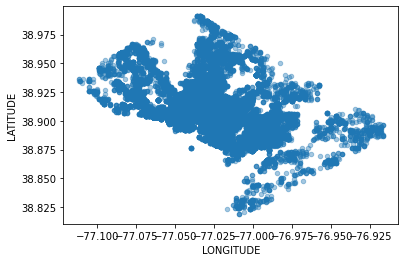

In [27]:
import matplotlib.pyplot as plt
parking_violations.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.4)
plt.show()
